In [1]:
from sentence_transformers import SentenceTransformer
from surrealdb import Surreal

/home/lanv/Desktop/INA_project_recipes/venv/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
data = open("ingredients.txt").readlines()

In [12]:
# sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
data = data[:600]
embeddings = model.encode(data)
print(embeddings[0])

[-6.86089247e-02  3.53767723e-02 -3.36957835e-02  4.31684367e-02
  1.04663027e-02 -7.87060708e-03  1.39054745e-01  9.39818397e-02
 -1.06415004e-02 -2.52798945e-03  2.12172931e-03 -9.37893540e-02
 -1.94028541e-02 -8.13857000e-03 -5.80917187e-02 -9.13973227e-02
  7.28935823e-02 -3.18558849e-02 -3.45191956e-02  2.27390379e-02
 -1.13151250e-02  5.31935133e-03  6.64400533e-02  4.46248949e-02
  4.56643067e-02  4.10296209e-02 -1.91140808e-02 -2.08277479e-02
 -4.74291444e-02 -5.42806648e-02  6.29762039e-02  9.65706930e-02
  9.39703062e-02 -6.91280589e-02  2.62550432e-02 -1.04622796e-01
  3.78672518e-02  1.48711335e-02 -7.50448629e-02  1.07753426e-02
 -4.15593386e-02 -6.11050278e-02  2.10250318e-02 -9.23674405e-02
 -3.24350037e-02 -8.94679129e-03  2.85828207e-02  7.13853464e-02
  6.76742345e-02  3.93967554e-02  3.43400389e-02  1.20281819e-02
 -8.78921673e-02  3.64446752e-02  7.95274675e-02  2.91628018e-02
 -1.93245225e-02  1.83922902e-03 -5.94316721e-02  9.45483223e-02
 -2.06886251e-02  5.60024

In [21]:
# clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(embeddings)
clusters = kmeans.predict(embeddings)

In [22]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

model = TSNE(n_components=2, random_state=0)
out = model.fit_transform(embeddings).reshape(2, -1)


/tmp/ipykernel_30079/298218023.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


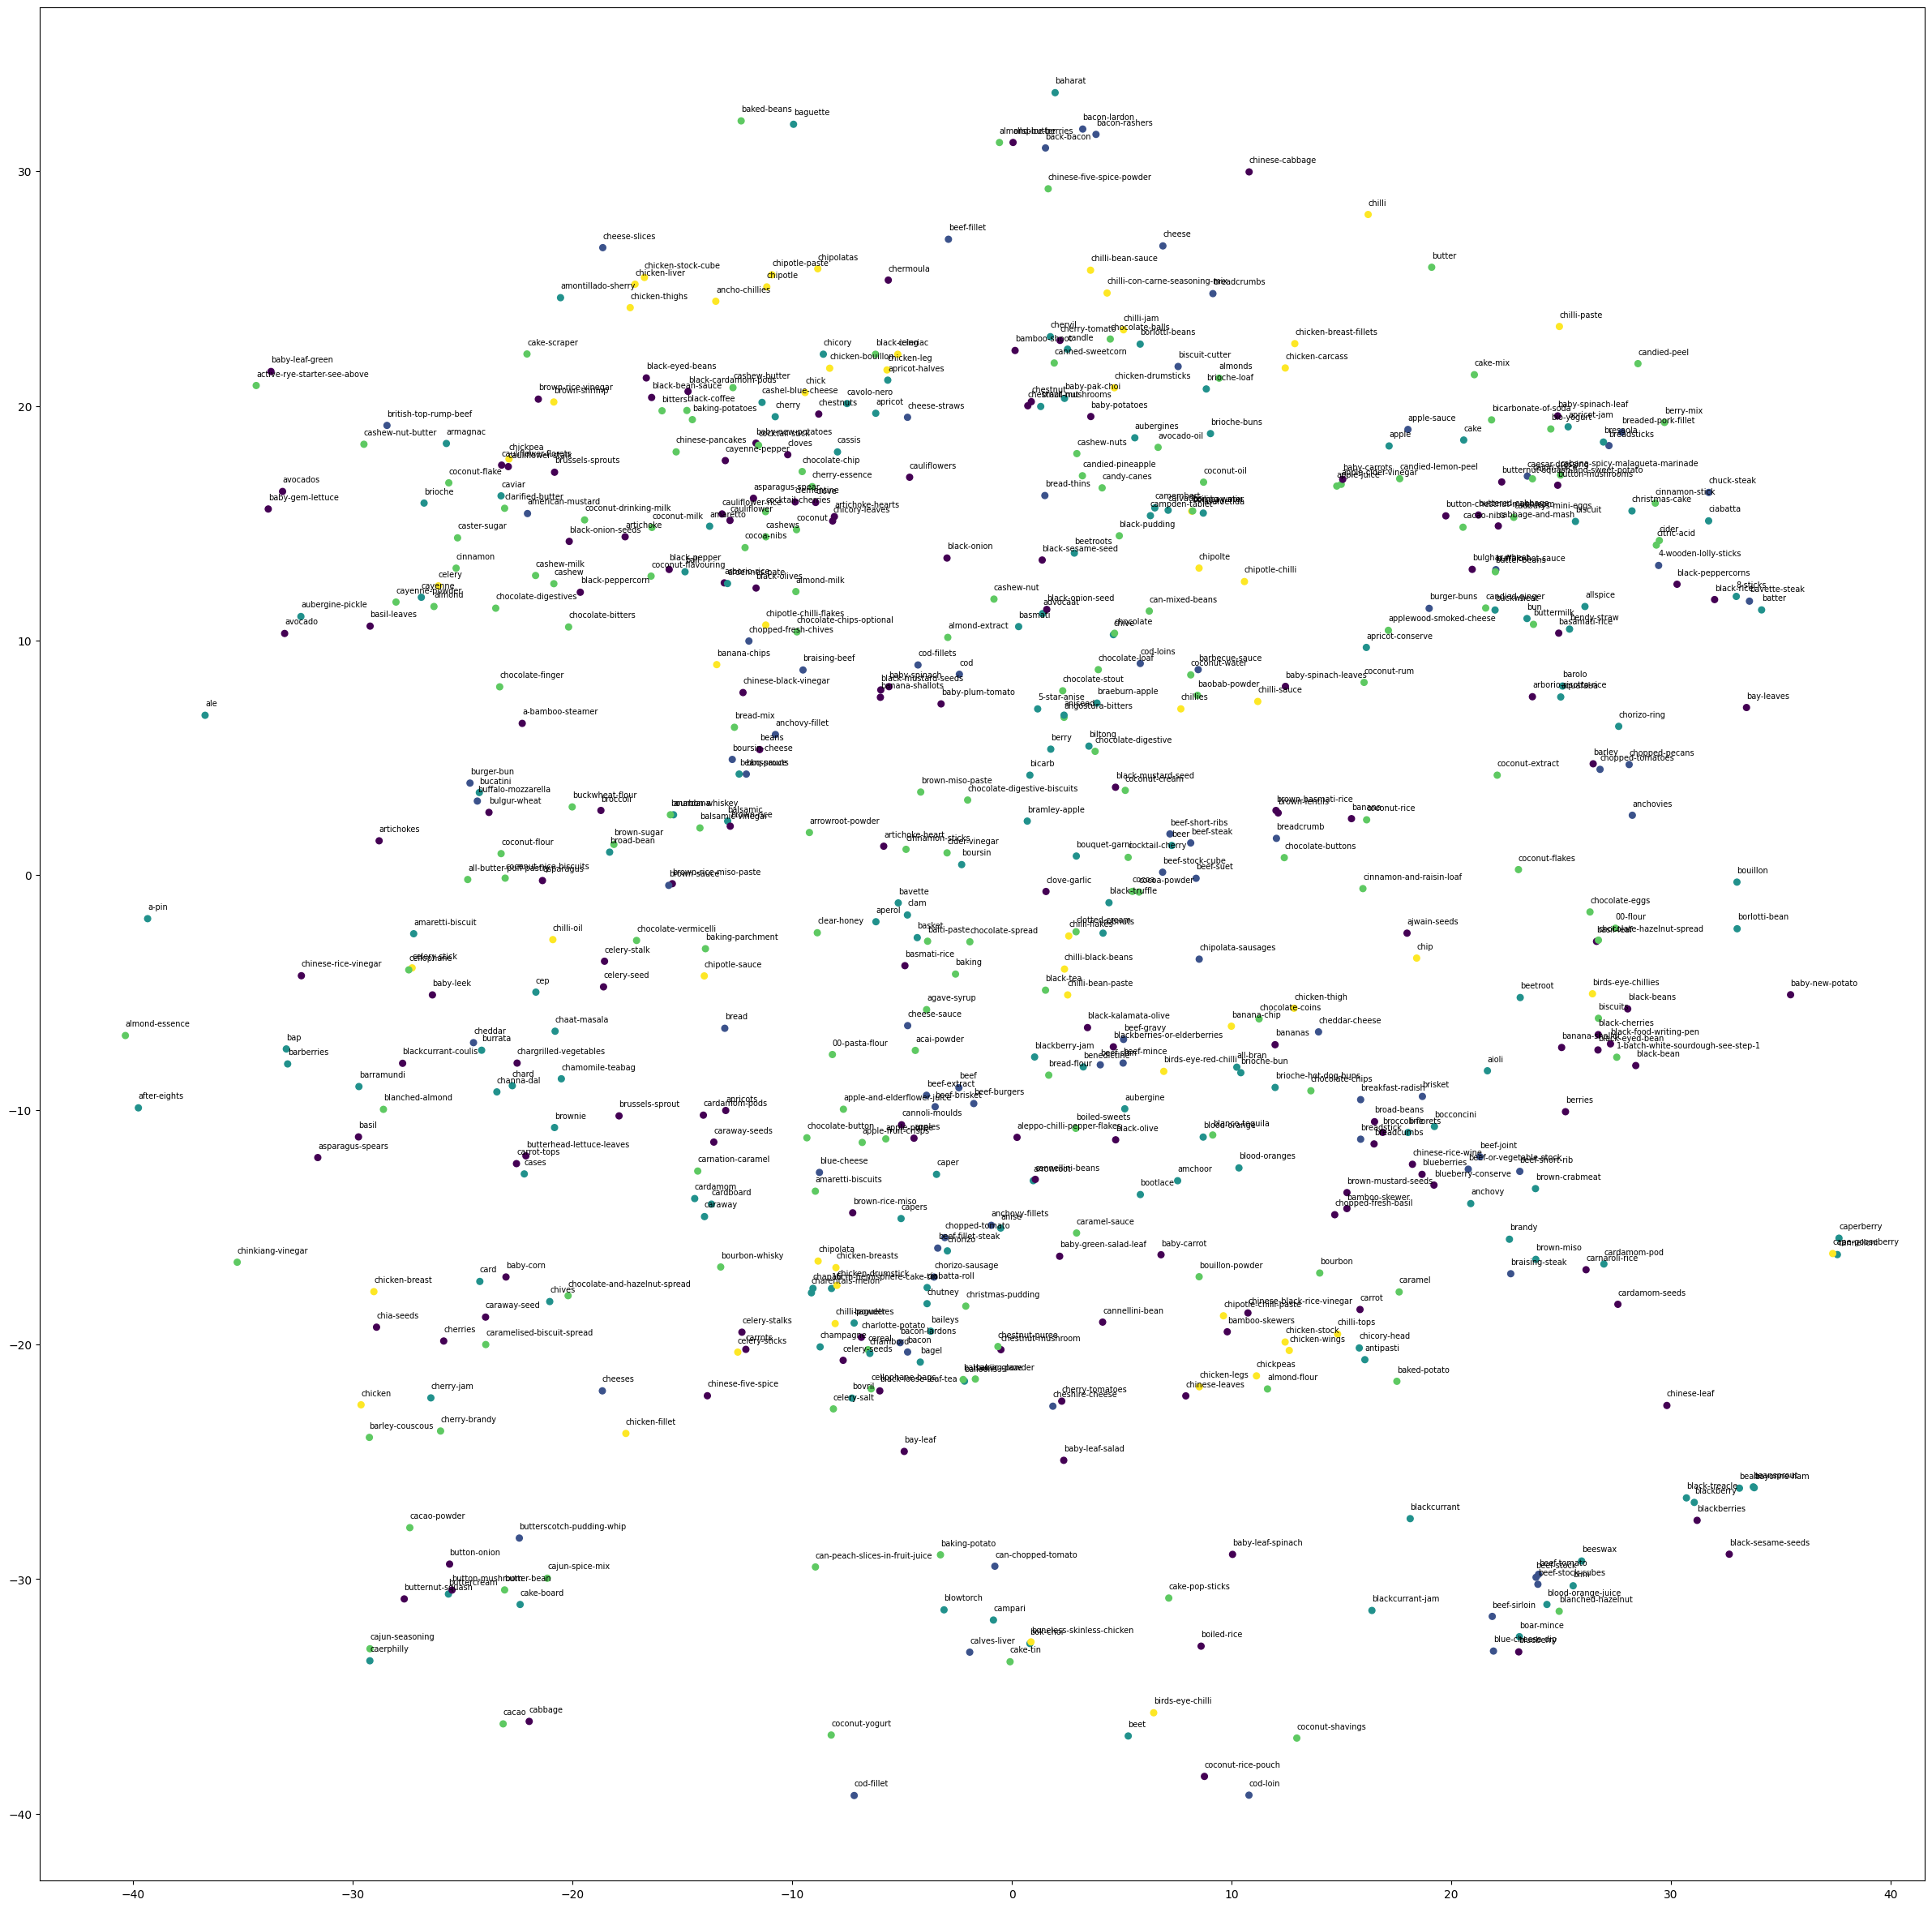

In [23]:
fig, axis= plt.subplots(1,1, figsize=(30, 30))
axis.scatter(out[0], out[1], s=30, c=clusters)
fig.show()
for i,t in enumerate(data):
  axis.text(out[0][i], out[1][i], t, fontsize=7)

In [9]:
fig.savefig("vn.png")